<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import copy
import pandas as pd

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [2]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [3]:
# experimental tuning
tuning_meas = pickle.load(open('../../data_final/fig2_panel_f0fit.pkl','rb'))
tuning_meas.keys()

dict_keys(['x1', 'y1', 'label', 'xtheo', 'ytheo', 'xlabel', 'ylabel', 'params'])

In [4]:
# JJCPW tuning
tuning_JJCPW = pickle.load(open('../../data_final/JJarrayCPW_analytical_1um_f0vI.pkl','rb'))
tuning_JJCPW.keys()

dict_keys(['xopt', 'yopt'])

In [5]:
# CPW_1Dpath = glob.glob('../../../../../projects/Felix/DC_bias_aluminum_constrictions/circuit_analysis/Figure5/JJ_CPW_1D.pkl')
# CPW_1Dpath = glob.glob('../../../../../projects/Felix/DC_bias_aluminum_constrictions/circuit_analysis/Figure5/CPW_1D.pkl')
# cpw_1d_base = pickle.load(open(CPW_1Dpath[0],'rb'))
# CPW_1Dpath = glob.glob('../../../../../projects/Felix/DC_bias_aluminum_constrictions/circuit_analysis/Figure5/CPW_1D_kex4.pkl')
# CPW_1Dpath = glob.glob('../../../../../projects/Felix/DC_bias_aluminum_constrictions/circuit_analysis/Duffing_loop2/lineplots-sensitivity-data/JJ_CPW_1D_000.9_908.pkl')
CPW_1Dpath = glob.glob('../../data_final/JJ_CPW_1D_001.0_845.pkl')
cpw_1d = pickle.load(open(CPW_1Dpath[0],'rb'))
# RLC_1Dpath = glob.glob('../../../../../projects/Felix/DC_bias_aluminum_constrictions/circuit_analysis/Figure5/RLC_1D.pkl')
# rlc_1d = pickle.load(open(RLC_1Dpath[0],'rb'))
CPWsketchpath = glob.glob('temp/fig5_CPW_cmap.svg.png')
circuit = plt.imread(CPWsketchpath[0])
# CPWoldsketchpath = glob.glob('../../../../../projects/Felix/DC_bias_aluminum_constrictions/current_detection/figures/fig5_CPWold_cmap.svg.png')
# circuitold = plt.imread(CPWoldsketchpath[0])

In [6]:
# minimum experimental line
panelcpath = glob.glob('../../data_final/fig4_panel_c_v2.pkl')
panel_c = pickle.load(open(panelcpath[0],'rb'))

In [7]:
dpi = 1000
figtextsize=10

In [8]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

In [9]:
import matplotlib.ticker as ticker

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


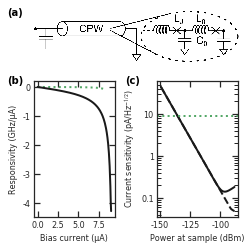

In [10]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(8.6,8.6),constrained_layout=True)
gs = fig.add_gridspec(2, 2, height_ratios=[1,2],wspace=0.5,hspace=0.2)

axa = fig.add_subplot(gs[0,:])
im = axa.imshow(circuit,interpolation='none')

axb = fig.add_subplot(gs[1,0])
plt.plot(tuning_meas['xtheo'],np.gradient(tuning_meas['ytheo'],tuning_meas['xtheo']),c='g',ls=':')
plt.plot(tuning_JJCPW['xopt'],np.gradient(tuning_JJCPW['yopt'],tuning_JJCPW['xopt']),c='k')
plt.xticks([0,2.5,5,7.5])
plt.xlabel('Bias current (µA)')
plt.ylabel('Responsivity (GHz/µA)')

axc = fig.add_subplot(gs[1,1])
plt.plot(cpw_1d['x2'],cpw_1d['y2'],label='CPW',c='k',ls='--')
plt.plot(cpw_1d['x'],cpw_1d['y'],label='CPW',c='k')
# plt.plot(cpw_1d_base['x'],cpw_1d_base['y'],label='CPWbase',c='C1')
# plt.plot(cpw_1d['x'],cpw_1d['y'],label='CPW')#,c='k')
# plt.plot(rlc_1d['x'],rlc_1d['y'],label='RLC')#,c='k')
# plt.xlabel(rlc_1d['xlabel'])
plt.xlabel('Power at sample (dBm)')
# plt.ylabel(r'Sensitivity (pA/$\sqrt{\mathrm{\mathsf{Hz}}}$)')
plt.ylabel(r'Current sensitivity (pA/Hz$^{-1/2}$)')
plt.yscale('log')
xlims = plt.gca().get_xlim()
plt.axhline(panel_c['ymin'],c='g',ls=':')
# plt.fill_between(xlims,panel_c['ymin'],1e3,facecolor=cmap(0.1),alpha=0.9)
# plt.fill_between(xlims,panel_c['ymin'],1e3,hatch="x",edgecolor=cmap(0.1),facecolor='w')
axc.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))

# plt.ylim(1e-2,1e2)
# plt.xlim(-150,-100)
# plt.xlim(min(cpw_1d['x']),max(cpw_1d['x']))

axa.axis('off')
axa.axes.xaxis.set_ticklabels([])
axa.axes.yaxis.set_ticklabels([])
    
axa.text(-0.23,1.5, '(a)', fontsize=figtextsize, color='black', weight='bold',transform=axb.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axb.text(-0.23,1, '(b)', fontsize=figtextsize, color='black', weight='bold', transform=axb.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
axc.text(-0.3,1, '(c)', fontsize=figtextsize, color='black', weight='bold', transform=axc.transAxes, verticalalignment = 'center', horizontalalignment = 'center')

plt.savefig('Figure5.pdf',bbox_inches='tight',dpi=dpi)
plt.show()
plt.close()

In [11]:
tuning_meas['xtheo'][-1]

8.3673469388

In [12]:
tuning_JJCPW['xopt'][-1]

9.0